In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

import gc

# 1️⃣데이터 로드

train

In [3]:
# parquet 파일 데이터를 읽어온다.
path = 'open/train/1.회원정보/'

# 201807부터 201812까지의 데이터 파일을 하나의 데이터프레임에 저장
data_dict = {}
for i in range(7, 13):
    key = f'data{i:02d}'
    file_path = f'{path}2018{i:02d}_train_회원정보.parquet'
    data_dict[key] = pd.read_parquet(file_path)
# 데이터프레임을 하나로 합친다.
df = pd.concat(data_dict.values(), ignore_index=True)
# 메모리 해제
gc.collect()
# 데이터프레임 확인
print(df.shape)

(2400000, 78)


test

In [29]:
# parquet 파일 데이터를 읽어온다.
path = 'open/test/1.회원정보/'

# 201807부터 201812까지의 데이터 파일을 하나의 데이터프레임에 저장
data_dict2 = {}
for i in range(7, 13):
    key = f'data{i:02d}'
    file_path = f'{path}2018{i:02d}_test_회원정보.parquet'
    data_dict2[key] = pd.read_parquet(file_path)
# 데이터프레임을 하나로 합친다.
df_test = pd.concat(data_dict2.values(), ignore_index=True)
# 메모리 해제
gc.collect()
# 데이터프레임 확인
print(df_test.shape)

(600000, 77)


---

In [4]:
# segment랑 ID 컬럼만 따로 저장
df_segment = df[['ID', 'Segment']].copy()
df_segment

,ID,Segment
0,TRAIN_000000,D
1,TRAIN_000001,E
2,TRAIN_000002,C
3,TRAIN_000003,D
4,TRAIN_000004,E
...,...,...
2399995,TRAIN_399995,E
2399996,TRAIN_399996,D
2399997,TRAIN_399997,C
2399998,TRAIN_399998,E


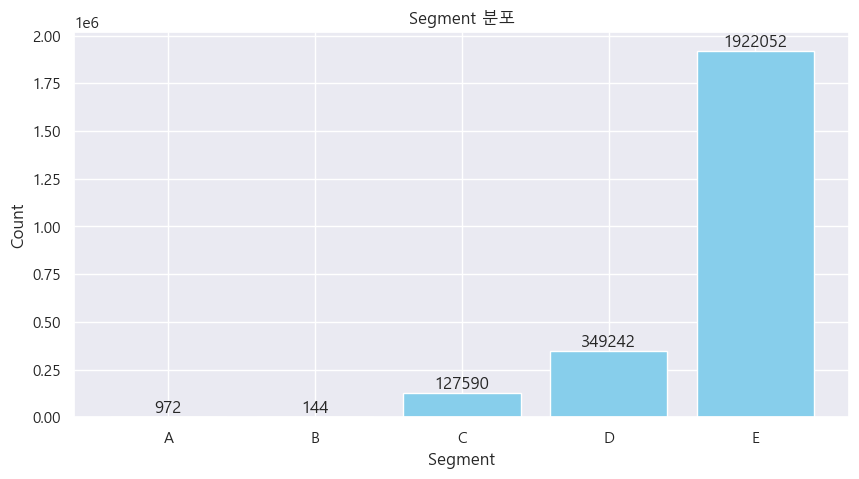

In [5]:
# Segment 컬럼 시각화
# 오름차순 정렬 및 막대그래프 위에 숫자 표시

plt.figure(figsize=(10, 5))
segment_counts = df_segment['Segment'].value_counts().sort_index()  # 오름차순 정렬

bars = plt.bar(segment_counts.index, segment_counts.values, color='skyblue')
plt.title('Segment 분포')
plt.xlabel('Segment')
plt.ylabel('Count')

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.show()

# 2️⃣데이터 확인
### 💌notion 컬럼 분석 내용
1. ~~(8)'소지여부_신용'~~ 
2. (11)'입회일자_신용' 제거
3. (15)'동의여부_한도증액안내' 제거
4. (20)'가입통신회사코드' 제거
5. (28~32, 33~37)데이터 파악
    - 신용체크 컬럼 제거

In [6]:
# '입회일자_신용' 컬럼 제거
df.drop(columns=['입회일자_신용'], inplace=True)

In [30]:
df_test.drop(columns=['입회일자_신용'], inplace=True)

In [7]:
# '동의여부_한도증액안내' 컬럼 제거
df.drop(columns=['동의여부_한도증액안내'], inplace=True)

In [31]:
df_test.drop(columns=['동의여부_한도증액안내'], inplace=True)

In [ ]:
# '가입통신회사코드' 컬럼 제거
df.drop(columns=['가입통신회사코드'], inplace=True)

In [32]:
df_test.drop(columns=['가입통신회사코드'], inplace=True)

|컬럼|내용|
|---|---|
|유효 카드수|특정 시점에 정상적으로 사용 가능한 카드 수|
|이용가능 카드수|실제로 사용하거나 사용 가능한 카드 수|
|이용 카드수|유효한 카드 중 사용 정지된 카드는 제외|

|컬럼|내용|
|---|---|
|신용체크|신용카드+체크카드|
|신용|본인 명의의 신용카드|
|신용_가족|가족 명의로 발급되었지만 본인이 사용하는 신용카드 수|
|체크|본인 명의의 체크카드|
|체크 _가족|가족 명의로 발급되었지만 본인이 사용하는 체크카드 수|

In [9]:
# 유효 카드수

# 신용체크는 신용카드와 체크카드를 합친 것이므로 제거
df.drop(columns=['유효카드수_신용체크'], inplace=True)

In [33]:
df_test.drop(columns=['유효카드수_신용체크'], inplace=True)

In [10]:
# 이용가능카드수

df.drop(columns=['이용가능카드수_신용체크'], inplace=True)

In [34]:
df_test.drop(columns=['이용가능카드수_신용체크'], inplace=True)

In [11]:
# 이용카드수

# 이용카드수_체크_가족은 전부 0이므로 제거? 혹은 비교를 위해 냅둬?? 
df.drop(columns=['이용카드수_신용체크'], inplace=True)

In [35]:
df_test.drop(columns=['이용카드수_신용체크'], inplace=True)

In [12]:
# 이용금액

df.drop(columns=['이용금액_R3M_신용체크'], inplace=True)

In [36]:
df_test.drop(columns=['이용금액_R3M_신용체크'], inplace=True)

In [13]:
# 청구금액_기본연회비, 청구금액_제휴연회비 제거
# 기본연회비, 제휴연회비와 같은 컬럼임
df.drop(columns=['청구금액_기본연회비_B0M'], inplace=True)
df.drop(columns=['청구금액_제휴연회비_B0M'], inplace=True)

In [37]:
df_test.drop(columns=['청구금액_기본연회비_B0M'], inplace=True)
df_test.drop(columns=['청구금액_제휴연회비_B0M'], inplace=True)

In [14]:
# 데이터프레임 df에서 값이 하나(즉, 모든 값이 동일)인 컬럼 찾기
unique_one_cols = [col for col in df.columns if df[col].nunique() == 1]
print("값이 하나인 컬럼:", unique_one_cols)

값이 하나인 컬럼: ['이용카드수_체크_가족', '이용금액_R3M_체크_가족', '연회비할인카드수_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']


In [15]:
# 데이터 값이 하나인 컬럼 제거
df.drop(columns=unique_one_cols, inplace=True)

In [38]:
df_test.drop(columns=unique_one_cols, inplace=True)

In [20]:
df.drop(columns=['최종유효년월_신용_이용가능'], inplace=True)
df.drop(columns=['최종유효년월_신용_이용'], inplace=True)
df.drop(columns=['최종카드발급일자'], inplace=True)

In [39]:
df_test.drop(columns=['최종유효년월_신용_이용가능'], inplace=True)
df_test.drop(columns=['최종유효년월_신용_이용'], inplace=True)
df_test.drop(columns=['최종카드발급일자'], inplace=True)

# 3️⃣데이터 처리


In [16]:
# 데이터프레임 df의 모든 컬럼에서 결측치 확인
missing_values = df.isnull().sum()
if missing_values.any():
    print("결측치가 있는 컬럼:")
    print(missing_values[missing_values > 0])

결측치가 있는 컬럼:
직장시도명             244969
_1순위신용체크구분         27950
_2순위신용체크구분        958115
최종유효년월_신용_이용가능    210447
최종유효년월_신용_이용      534231
최종카드발급일자           41965
dtype: int64


In [40]:
# 데이터프레임 df의 모든 컬럼에서 결측치 확인
missing_values = df_test.isnull().sum()
if missing_values.any():
    print("결측치가 있는 컬럼:")
    print(missing_values[missing_values > 0])

결측치가 있는 컬럼:
직장시도명          62233
_1순위신용체크구분      7231
_2순위신용체크구분    239888
dtype: int64


In [17]:
# 직장시도명 확인
# df['직장시도명'].value_counts(dropna=False)

# 결측치는 '기타'로 채움
df['직장시도명'].fillna('기타', inplace=True)
df['직장시도명'].value_counts()

직장시도명
경기    598244
서울    576618
기타    244969
인천    146944
부산    131285
대전    120697
충북    103951
경남     94527
경북     82975
대구     76605
울산     66275
전남     52849
광주     34100
충남     28361
전북     20442
강원     15485
세종      3117
제주      2556
Name: count, dtype: int64

In [41]:
df_test['직장시도명'].fillna('기타', inplace=True)
df_test['직장시도명'].value_counts()

직장시도명
경기    149122
서울    144290
기타     62233
인천     36173
부산     33477
대전     30201
충북     25862
경남     23039
경북     21206
대구     18986
울산     16182
전남     13182
광주      8709
충남      6966
전북      5160
강원      3773
세종       778
제주       661
Name: count, dtype: int64

- 카드를 잘 사용하지 않는 사람인 경우?
    - 기타로 결측치 처리
    - 연령에 10대는 없음

In [18]:
# _1순위신용체크구분 
# df['_1순위신용체크구분'].value_counts(dropna=False)

# 결측치는 '기타'로 채움
df['_1순위신용체크구분'].fillna('기타', inplace=True)
df['_1순위신용체크구분'].value_counts()

_1순위신용체크구분
신용    2295461
체크      76589
기타      27950
Name: count, dtype: int64

In [42]:
df_test['_1순위신용체크구분'].fillna('기타', inplace=True)

In [19]:
# _2순위신용체크구분
df['_2순위신용체크구분'].value_counts(dropna=False)

# 결측치는 '기타'로 채움
df['_2순위신용체크구분'].fillna('기타', inplace=True)
df['_2순위신용체크구분'].value_counts()

_2순위신용체크구분
기타    958115
신용    873447
체크    568438
Name: count, dtype: int64

In [43]:
df_test['_2순위신용체크구분'].fillna('기타', inplace=True)

In [22]:
len(df.columns)

57

In [44]:
len(df_test.columns)

56

# 4️⃣데이터 저장

In [1]:
1001/0

ZeroDivisionError: division by zero

In [ ]:
# df_segment를 parquet파일로 저장
df_segment.to_parquet('train_회원정보_segment.parquet', index=False)

In [45]:
df_test.to_parquet('test_회원정보.parquet', index=False)

In [ ]:
# df를 parquet파일로 저장 => segment 존재
df.to_parquet('train_회원정보.parquet', index=False)

In [ ]:
print("회원정보 데이터프레임을 parquet 파일로 저장 완료")